In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import local_functions
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:

'''
This function takes two categories, find unique values when grouped by both those categories. 
Then a subset is chosen such that the number of unique values > a number
Based on this subset, a list of categories is returned which is then used to get a subset dataframe

'''
def slice_df(df, category1, category2, value, num):
    grouped_by_category = df.groupby([
    category1, category2])[value].nunique().reset_index()
    result = grouped_by_category[grouped_by_category[value]>num]
    list_of_category = result[category2].tolist()
    return_df = df[df[category2].isin (list_of_category)]  
    return return_df


In [8]:
trips = pd.read_csv('../Data/data_complete_trips.csv')

trips['trip_date'] = trips['TRIP_ID'].astype('str') + trips['CALENDAR_ID'].astype('str')

In [23]:
grouped_ = trips.groupby(['ROUTE_ABBR','OPERATOR'])['trip_date'].nunique().reset_index()

In [51]:
grouped_df = grouped_[grouped_['trip_date']>400]

In [52]:
grouped_df

,ROUTE_ABBR,OPERATOR,trip_date
16,3,1204,433
154,7,341,443
163,7,723,468
206,7,2164,497
213,7,2312,492
215,7,2324,463
282,22,1040,532
285,22,1222,499
295,22,1617,446
301,22,1761,738


In [53]:
subset_trips = pd.merge(trips, grouped_df, on = ['ROUTE_ABBR', 'OPERATOR'])

In [54]:
# subset_trips = slice_df(trips, 'ROUTE_ABBR','OPERATOR', 'trip_date', 400)
subset_trips['OPERATOR'].nunique()

22

Removing the outliers in the resulting dataframe

In [55]:
adherence_ub = subset_trips['ADHERENCE'].quantile(0.999)
adherence_lb = subset_trips['ADHERENCE'].quantile(0.001)

perc_hdwy_dev_ub = subset_trips['HDWY_DEV'].quantile(0.999)
perc_hdwy_dev_lb = subset_trips['HDWY_DEV'].quantile(0.001)

subset_trips_cut = (
    subset_trips
    .loc[(subset_trips['ADHERENCE'] >= adherence_lb) & (subset_trips['ADHERENCE'] <= adherence_ub)]
    .loc[(subset_trips['HDWY_DEV'] >= perc_hdwy_dev_lb) & (subset_trips['HDWY_DEV'] <= perc_hdwy_dev_ub)]
)

In [56]:
subset_trips_cut

,Unnamed: 0,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date_x,trip_date_y
7,7,120230801,1,99457897,8/1/23,22,2200,1040,345106,0,...,0,0,1,0,0.0,0,63,13.216666,345106120230801,532
8,8,120230801,1,99457898,8/1/23,22,2200,1040,345106,0,...,0,0,1,0,0.0,0,70,0.000000,345106120230801,532
9,9,120230801,1,99457899,8/1/23,22,2200,1040,345106,0,...,0,0,1,0,0.0,0,80,0.000000,345106120230801,532
11,11,120230801,1,99457901,8/1/23,22,2200,1040,345107,0,...,0,0,1,0,0.0,0,97,10.800000,345107120230801,532
12,12,120230801,1,99457902,8/1/23,22,2200,1040,345107,0,...,1,0,0,0,0.0,0,112,0.000000,345107120230801,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45421,346931,120230930,2,100402178,9/30/23,23,2313,379,350584,0,...,0,0,1,0,0.0,0,489,5.416666,350584120230930,553
45422,346932,120230930,2,100402179,9/30/23,23,2313,379,350584,0,...,0,0,1,0,0.0,0,511,0.000000,350584120230930,553
45424,346934,120230930,2,100402181,9/30/23,23,2313,379,350585,0,...,0,0,1,0,0.0,0,526,12.800000,350585120230930,553
45425,346935,120230930,2,100402182,9/30/23,23,2313,379,350585,0,...,0,0,1,1,0.0,0,541,0.000000,350585120230930,553


In [12]:
subset_trips

,Unnamed: 0,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date
0,0,120230801,1,99457890,8/1/23,22,2200,1040,345104,0,...,NaN,0,0,1,0,0.0,0,2,6.500000,345104120230801
1,1,120230801,1,99457891,8/1/23,22,2200,1040,345104,0,...,NaN,0,0,1,0,0.0,0,9,0.000000,345104120230801
2,2,120230801,1,99457892,8/1/23,22,2200,1040,345104,0,...,NaN,0,0,1,0,0.0,0,19,0.000000,345104120230801
3,3,120230801,1,99457893,8/1/23,22,2200,1040,345104,0,...,NaN,0,0,1,0,NaN,0,35,0.000000,345104120230801
4,4,120230801,1,99457894,8/1/23,22,2200,1040,345105,0,...,NaN,0,0,1,0,0.0,0,36,12.866666,345105120230801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348686,350323,120230930,2,100406610,9/30/23,7,702,2312,353448,0,...,5.266666,0,1,0,0,0.0,0,539,0.000000,353448120230930
348687,350324,120230930,2,100406611,9/30/23,7,702,2312,353448,0,...,NaN,0,1,0,0,NaN,0,551,0.000000,353448120230930
348688,350325,120230930,2,100406612,9/30/23,7,702,2312,353449,0,...,1.866666,0,0,1,0,0.0,0,552,0.000000,353449120230930
348689,350326,120230930,2,100406613,9/30/23,7,702,2312,353449,0,...,17.500000,0,1,0,0,0.0,0,563,0.000000,353449120230930


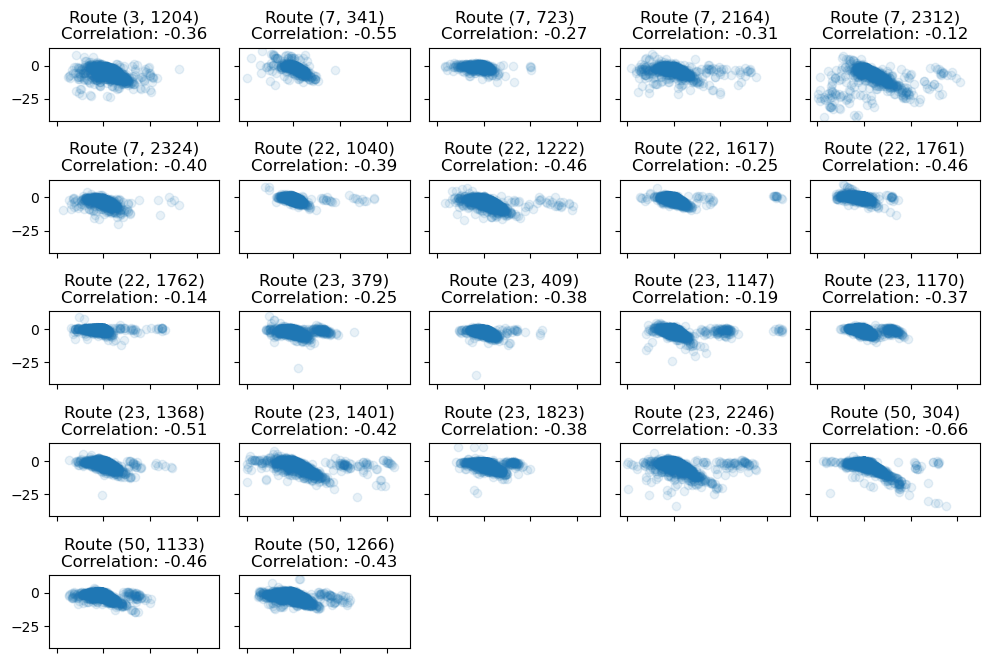

In [57]:
# Group the data by the 'Category' column
grouped = subset_trips_cut.groupby(['ROUTE_ABBR', 'OPERATOR'])

# Define the number of rows and columns for subplots
num_rows = 6
num_cols = 5

# Calculate the total number of subplots
total_subplots = len(grouped)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8), sharex=True, sharey= True)

# Flatten the axes array if necessary
if total_subplots > 1:
    axes = axes.ravel()

# Loop through the groups and create subplots
for i, (category, group) in enumerate(grouped):
    ax = axes[i]  # Select the current subplot
    correlation = group['HDWY_DEV'].corr(group['ADHERENCE'])
    ax.scatter(group['HDWY_DEV'],group['ADHERENCE'],label=category, alpha=0.1)      
    # Set the title with the correlation value
    ax.set_title(f'Route {category}\nCorrelation: {correlation:.2f}')
# Hide any empty subplots
for i in range(total_subplots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout to prevent subplot overlap
plt.tight_layout()

# Display the plot
plt.show()

In [59]:
subset_trips_cut['NORM_HDWY_DEV_OP'] = subset_trips_cut.groupby(
    ['ROUTE_ABBR','OPERATOR'])['HDWY_DEV'].transform('mean')

subset_trips_cut['NORM_ADHERENCE_OP'] = subset_trips_cut.groupby(
    ['ROUTE_ABBR','OPERATOR'])['ADHERENCE'].transform('mean')
subset_trips_cut['NORM_DWELL_IN_MINS_OP'] = subset_trips_cut.groupby(
    ['ROUTE_ABBR','OPERATOR'])['DWELL_IN_MINS'].transform('mean')

subset_trips_cut['NORM_HDWY_DEV'] = subset_trips_cut.groupby(
    ['OPERATOR','trip_date_x'])['HDWY_DEV'].transform('mean')

subset_trips_cut['NORM_ADHERENCE'] = subset_trips_cut.groupby(
    ['OPERATOR','trip_date_x'])['ADHERENCE'].transform('mean')
subset_trips_cut['NORM_DWELL_IN_MINS'] = subset_trips_cut.groupby(
    ['OPERATOR','trip_date_x'])['DWELL_IN_MINS'].transform('mean')

In [60]:
subset_trips_cut

,Unnamed: 0,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,...,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date_x,trip_date_y,NORM_HDWY_DEV_OP,NORM_ADHERENCE_OP,NORM_DWELL_IN_MINS_OP,NORM_HDWY_DEV,NORM_ADHERENCE,NORM_DWELL_IN_MINS
7,7,120230801,1,99457897,8/1/23,22,2200,1040,345106,0,...,63,13.216666,345106120230801,532,0.383885,-1.297840,4.661778,1.383333,-1.272222,4.405555
8,8,120230801,1,99457898,8/1/23,22,2200,1040,345106,0,...,70,0.000000,345106120230801,532,0.383885,-1.297840,4.661778,1.383333,-1.272222,4.405555
9,9,120230801,1,99457899,8/1/23,22,2200,1040,345106,0,...,80,0.000000,345106120230801,532,0.383885,-1.297840,4.661778,1.383333,-1.272222,4.405555
11,11,120230801,1,99457901,8/1/23,22,2200,1040,345107,0,...,97,10.800000,345107120230801,532,0.383885,-1.297840,4.661778,-3.025000,0.091667,5.400000
12,12,120230801,1,99457902,8/1/23,22,2200,1040,345107,0,...,112,0.000000,345107120230801,532,0.383885,-1.297840,4.661778,-3.025000,0.091667,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45421,346931,120230930,2,100402178,9/30/23,23,2313,379,350584,0,...,489,5.416666,350584120230930,553,0.172416,-1.753015,4.903686,0.203333,-2.316666,5.246666
45422,346932,120230930,2,100402179,9/30/23,23,2313,379,350584,0,...,511,0.000000,350584120230930,553,0.172416,-1.753015,4.903686,0.203333,-2.316666,5.246666
45424,346934,120230930,2,100402181,9/30/23,23,2313,379,350585,0,...,526,12.800000,350585120230930,553,0.172416,-1.753015,4.903686,-0.600000,-3.938888,4.266667
45425,346935,120230930,2,100402182,9/30/23,23,2313,379,350585,0,...,541,0.000000,350585120230930,553,0.172416,-1.753015,4.903686,-0.600000,-3.938888,4.266667


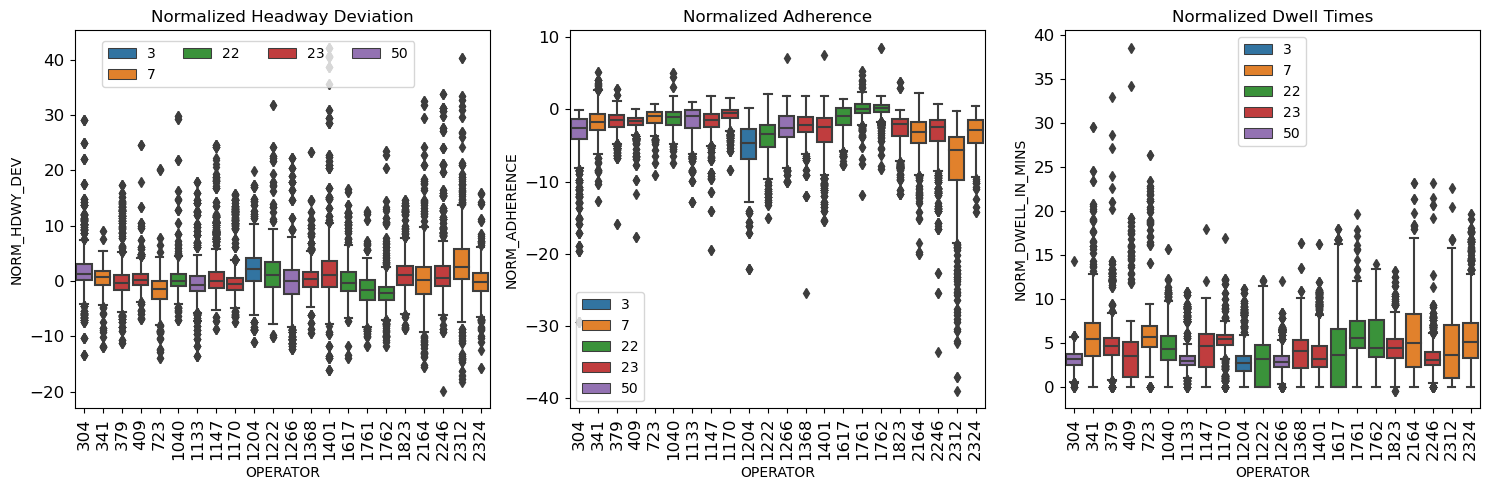

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(
    data=subset_trips_cut, 
    x= 'OPERATOR', 
    y= 'NORM_HDWY_DEV',
    hue = 'ROUTE_ABBR',
    dodge= False,
    ax=axs[0]    
    )
axs[0].tick_params(axis='both', labelsize=12) 
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend(loc='upper left',bbox_to_anchor=(0.05, 0.99), ncol=4)

sns.boxplot(
    data=subset_trips_cut, 
    x= 'OPERATOR', 
    y= 'NORM_ADHERENCE',
    hue = 'ROUTE_ABBR',
    dodge= False,
    ax=axs[1]    
    )
axs[1].tick_params(axis='both', labelsize=12) 
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend(loc='lower left')

sns.boxplot(
    data=subset_trips_cut, 
    x= 'OPERATOR', 
    y= 'NORM_DWELL_IN_MINS',
    hue = 'ROUTE_ABBR',
    dodge= False,
    ax=axs[2]    
    )
axs[2].tick_params(axis='both', labelsize=12) 
axs[2].tick_params(axis='x', rotation=90)
axs[2].legend(loc='upper center')

# Add titles and labels
axs[0].set_title('Normalized Headway Deviation')
axs[1].set_title('Normalized Adherence')
axs[2].set_title('Normalized Dwell Times')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



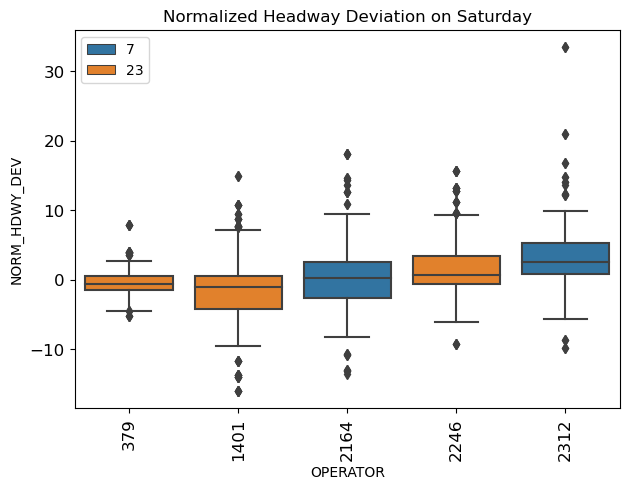

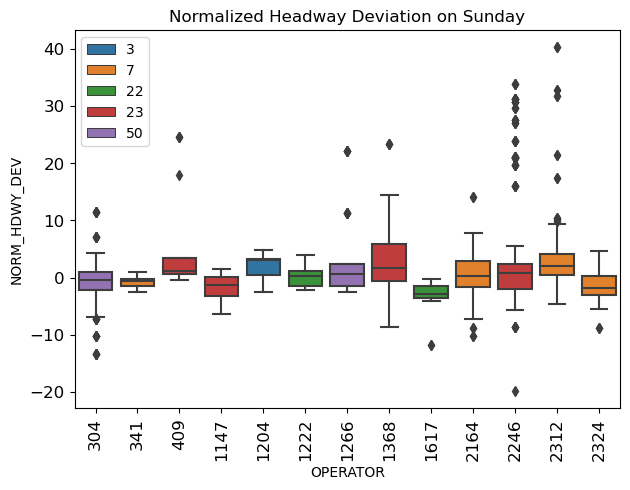

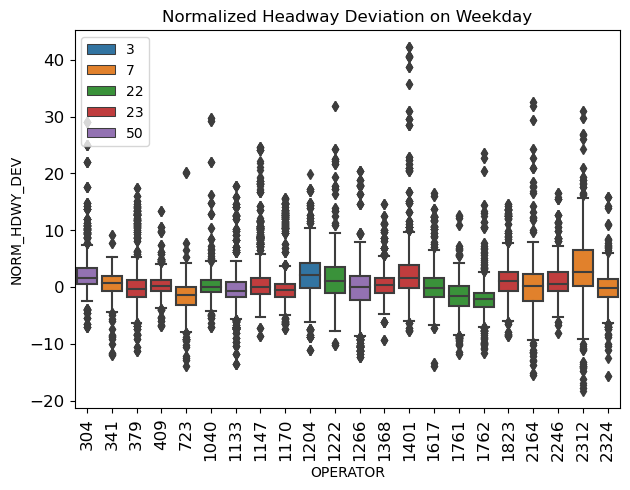

In [67]:
mapping_dict = {
    1: 'Weekday',
    2: 'Saturday',
    3: 'Sunday'
}

# Use the replace method to map the values
subset_trips_cut_copy = subset_trips_cut.replace({'SERVICE_ABBR':mapping_dict})


grouped_data = subset_trips_cut_copy.groupby('SERVICE_ABBR')
# Create separate boxplots for each category in the group
for day, group in grouped_data:
    plt.figure()  # Create a new figure for each category
    sns.boxplot(
        data=group, 
        x= 'OPERATOR', 
        y= 'NORM_HDWY_DEV',
        hue = 'ROUTE_ABBR',
        dodge= False
        )
    plt.xticks(rotation=90, fontsize = 12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.legend(loc='upper left')
    plt.title(f"Normalized Headway Deviation on {day}")

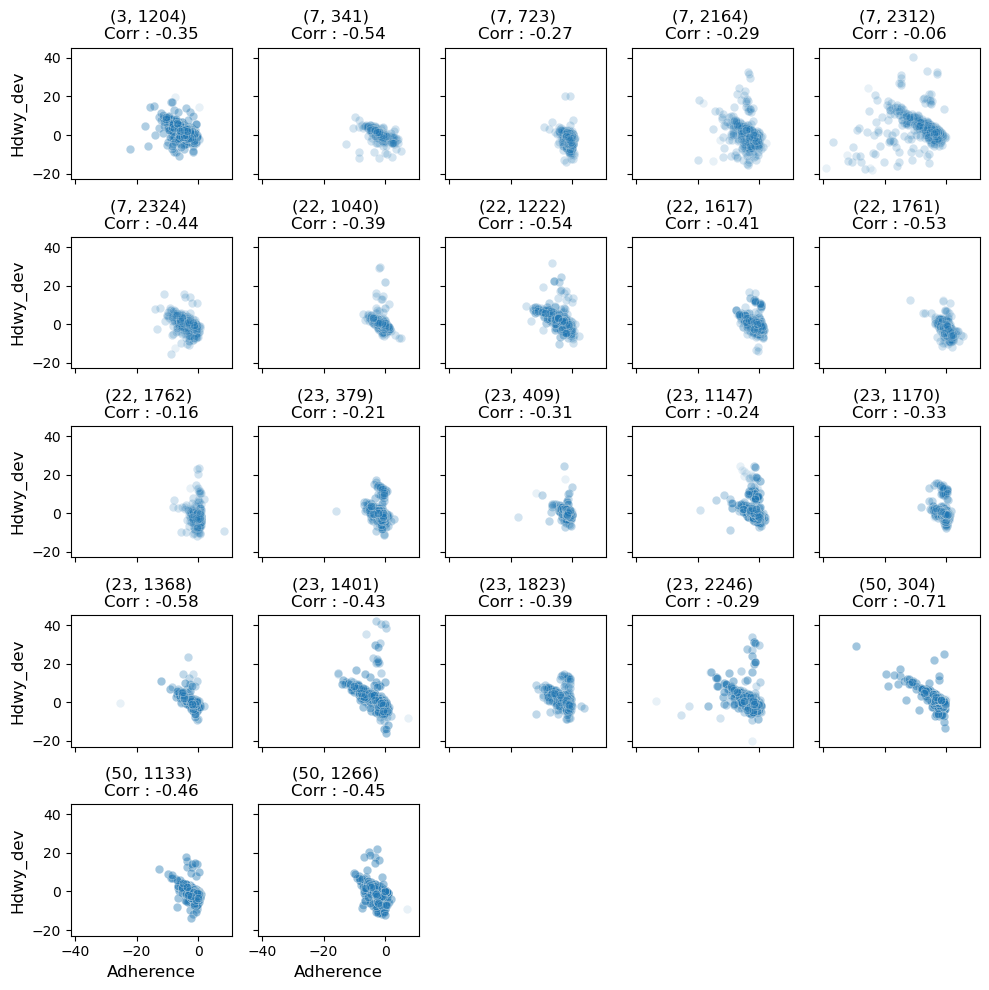

In [77]:
from scipy.stats import linregress
# Group the data by the 'Category' column
grouped = subset_trips_cut.groupby(['ROUTE_ABBR', 'OPERATOR'])

# Define the number of rows and columns for subplots
num_rows = 5
num_cols = 5

# Calculate the total number of subplots
total_subplots = len(grouped)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10), sharex=True, sharey= True)

# Flatten the axes array if necessary
if total_subplots > 1:
    axes = axes.ravel()

# Loop through the groups and create subplots
for i, (category, group) in enumerate(grouped):
    ax = axes[i]  # Select the current subplot
    correlation = group['NORM_ADHERENCE'].corr(group['NORM_HDWY_DEV'])
    # slope, intercept, r_value, p_value, std_err = linregress(group['NORM_HDWY_DEV'], group['NORM_ADHERENCE'])
    # group['regression'] = slope * group['NORM_HDWY_DEV'] + intercept
    sns.scatterplot(
        data=group,
        y = 'NORM_HDWY_DEV', 
        x= 'NORM_ADHERENCE', 
        alpha=0.1,
        ax=ax
        )
    # sns.lineplot(
    #     data=group,
    #     x = 'NORM_HDWY_DEV', 
    #     y= 'regression',
    #     ax=ax
    #     )
    # ax.set_title(f'Subplot {i + 1}'     
    # Set the title with the correlation value
    ax.set_title(f'{category} \nCorr : {correlation:.2f}', fontsize=12)
    ax.set_xlabel('Adherence', fontsize = 12)
    ax.set_ylabel('Hdwy_dev', fontsize = 12)
# Hide any empty subplots
for i in range(total_subplots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout to prevent subplot overlap
plt.tight_layout()
# plt.grid(linewidth = 0.5)
# Display the plot
plt.show()